# Pivoting

### Why? 피벗을 하지?
- 피벗(Pivot)이라는건 뭘까요? 피벗은 단어의 의미 그대로 회전중심축을 의미하는데, 원본 데이터를 사용자가 정의한 축을 중심으로 다양하게 분석(회전)해볼 수 있다는 의미입니다. 엑셀 97에서 처음 소개된 피벗테이블은 너무 복잡해보여서 사용자들이 쉽게 접근하지 못했던 것이 사실입니다. 엑셀 2007부터는 클릭 몇번으로 피벗테이블을 만들고 분석할 수 있게 되었는데, 여러분들도 저와 함께 쉽게 이해하실 수 있을겁니다.

## Pivoting long to wide format
 - 데이터베이스나 CSV 파일에 여러 개의 시계열 데이터를 저장하는 일반적인 방법은 시간순으로 나열하는 방법
 - csv파일 읽기: p.222쪽 참고 
 - 컬럼 이름 변경
 - 컬럼 합치기
 - 원하는 컬럼만 보여주기: p.169쪽 frame2.ix['three'] 부분 참고

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

    date, item, value
    1959-03-31 00:00:00, realgdp, 2710.349
    1959-03-31 00:00:00, infl, 0.000
    1959-03-31 00:00:00, unemp, 5.800
    1959-06-30 00:00:00, realgdp, 2778.801
    1959-06-30 00:00:00, infl, 2.340
    1959-06-30 00:00:00, unemp, 5.100
    1959-09-30 00:00:00, realgdp, 2775.488
    1959-09-30 00:00:00, infl, 2.740
    1959-09-30 00:00:00, unemp, 5.300
    1959-12-31 00:00:00, realgdp, 2785.204        

In [3]:
# header를 0으로 설정하겠다는건데.. 기본값.
# 계속 pivot 할 때 에러가 난다.
# names로 꼭 설정해야 하나보다. pivot이 인식하는 것은 names로 setting된 값인듯.
# 열과 행을 바꿔야 하기 때문에 이미 인식하고 있는 값이 없으면 error 뱉는것 같다.

# 이것 말고는 딱히 다른게 생각나지 않는다.
# csv 파일에서 1번째 줄인 header를 지우면 어떤 컬럼인지 모르니까 차라리 skiprows=1 을 해주는게 낫겠다.
# 6장 처음 부분에 read_csv 옵션들이 있으니 참고

ldata = pd.read_csv('ch07/pivot.csv', skiprows=1, names=['date', 'item', 'value'])
#ldata =  pd.read_csv('ch07/pivot.csv',header=0)
ldata

,date,item,value
0,1959-03-31 00:00:00,realgdp,2710.349
1,1959-03-31 00:00:00,infl,0.000
2,1959-03-31 00:00:00,unemp,5.800
3,1959-06-30 00:00:00,realgdp,2778.801
4,1959-06-30 00:00:00,infl,2.340
5,1959-06-30 00:00:00,unemp,5.100
6,1959-09-30 00:00:00,realgdp,2775.488
7,1959-09-30 00:00:00,infl,2.740
8,1959-09-30 00:00:00,unemp,5.300
9,1959-12-31 00:00:00,realgdp,2785.204


In [4]:
type(ldata)

pandas.core.frame.DataFrame

In [5]:
# 1번째 인자: 로우 색인으로 사용될 칼럼 이름
# 2번째 인자: 칼럼 색인으로 사용될 칼럼 이름
# 3번째 인자: DataFrame에 채워 넣을 값을 담고 있는 칼럼
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 00:00:00,0.00,2710.349,5.8
1959-06-30 00:00:00,2.34,2778.801,5.1
1959-09-30 00:00:00,2.74,2775.488,5.3
1959-12-31 00:00:00,NaN,2785.204,NaN


 - 한번에 2개의 컬럼 변형 

In [6]:
len(ldata)

10

In [7]:
ldata['value2'] = np.random.randn(len(ldata))

In [8]:
ldata.head()

,date,item,value,value2
0,1959-03-31 00:00:00,realgdp,2710.349,1.131054
1,1959-03-31 00:00:00,infl,0.000,-0.441035
2,1959-03-31 00:00:00,unemp,5.800,-0.752570
3,1959-06-30 00:00:00,realgdp,2778.801,0.764556
4,1959-06-30 00:00:00,infl,2.340,0.807142


In [9]:
pivoted = ldata.pivot('date','item')
pivoted.head()

value                     value2                    
item                 infl   realgdp  unemp      infl   realgdp     unemp
date                                                                    
1959-03-31 00:00:00  0.00  2710.349    5.8 -0.441035  1.131054 -0.752570
1959-06-30 00:00:00  2.34  2778.801    5.1  0.807142  0.764556 -0.191547
1959-09-30 00:00:00  2.74  2775.488    5.3 -0.946869 -0.328542  0.259008
1959-12-31 00:00:00   NaN  2785.204    NaN       NaN  0.013654       NaN

In [10]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 00:00:00,0.00,2710.349,5.8
1959-06-30 00:00:00,2.34,2778.801,5.1
1959-09-30 00:00:00,2.74,2775.488,5.3
1959-12-31 00:00:00,NaN,2785.204,NaN


 - pivot: set_index를 사용해서 계층적 색인을 만들고 unstack 메서드를 이용해서 형태를 변경하는 단축키같은 메서드

In [11]:
ldata.set_index(['date','item'])

value    value2
date                item                        
1959-03-31 00:00:00  realgdp  2710.349  1.131054
                     infl        0.000 -0.441035
                     unemp       5.800 -0.752570
1959-06-30 00:00:00  realgdp  2778.801  0.764556
                     infl        2.340  0.807142
                     unemp       5.100 -0.191547
1959-09-30 00:00:00  realgdp  2775.488 -0.328542
                     infl        2.740 -0.946869
                     unemp       5.300  0.259008
1959-12-31 00:00:00  realgdp  2785.204  0.013654

In [12]:
unstacked = ldata.set_index(['date','item']).unstack('item')
unstacked

value                     value2                    
item                 infl   realgdp  unemp      infl   realgdp     unemp
date                                                                    
1959-03-31 00:00:00  0.00  2710.349    5.8 -0.441035  1.131054 -0.752570
1959-06-30 00:00:00  2.34  2778.801    5.1  0.807142  0.764556 -0.191547
1959-09-30 00:00:00  2.74  2775.488    5.3 -0.946869 -0.328542  0.259008
1959-12-31 00:00:00   NaN  2785.204    NaN       NaN  0.013654       NaN

In [13]:
# set_index가 로우 설정
# set_index로 설정되지 않은 것들은 모두 열로 이동
unstacked = ldata.set_index(['date'])
unstacked

,item,value,value2
date,,,
1959-03-31 00:00:00,realgdp,2710.349,1.131054
1959-03-31 00:00:00,infl,0.000,-0.441035
1959-03-31 00:00:00,unemp,5.800,-0.752570
1959-06-30 00:00:00,realgdp,2778.801,0.764556
1959-06-30 00:00:00,infl,2.340,0.807142
1959-06-30 00:00:00,unemp,5.100,-0.191547
1959-09-30 00:00:00,realgdp,2775.488,-0.328542
1959-09-30 00:00:00,infl,2.740,-0.946869
1959-09-30 00:00:00,unemp,5.300,0.259008


## Data Transformation 
 - 필터링, 정제 및 다른 변형 역시 중요한 연산

### Remove Duplicates

In [14]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [15]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [16]:
data2 = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 3, 4]})
data2

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,3
6,two,4


In [17]:
# 2개 열이 모두 같아야 중복으로 인정 됨
data2.duplicated()

0    False
1     True
2    False
3    False
4     True
5     True
6    False
dtype: bool

In [18]:
pd.concat([data,data2,data.duplicated(),data2.duplicated()],axis=1)

,k1,k2,k1,k2,0,1
0,one,1,one,1,False,False
1,one,1,one,1,True,True
2,one,2,one,2,False,False
3,two,3,two,3,False,False
4,two,3,two,3,True,True
5,two,4,two,3,False,True
6,two,4,two,4,True,False


In [19]:
# druplicated 배열이 False인 DataFrame 반환
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [20]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [21]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [22]:
# 여러개 중복이 있을 경우 첫번째를 남기고 지우는데 이것은 마지막 것을 남긴다.
data.drop_duplicates(['k1'], take_last=True)

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead
  from ipykernel import kernelapp as app


,k1,k2,v1
2,one,2,2
6,two,4,6


In [23]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


## Transforming Data Using a Function or Mapping 
 - DataFrame의 칼럼이나 Series, 배열 안의 값을 기반으로 데이터의 형태를 변형하고 싶을 때

In [24]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami',
                           'honey ham', 'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


 - 해당 육류가 어떤 동물의 고기인지 알려줄 수 있는 칼럼을 하나 추가한다고 가정
 - 육류별 동물을 담고 있는 사전 데이터 작성

In [25]:
meat_to_animal = {
                  'bacon': 'pig',
                  'pulled pork': 'pig',
                  'pastrami': 'cow',
                  'corned beef': 'cow',
                  'honey ham': 'pig',
                  'nova lox': 'salmon'
                  }
meat_to_animal

{'bacon': 'pig',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon',
 'pastrami': 'cow',
 'pulled pork': 'pig'}

 - Series의 map 메서드는 사전류의 객체나 어떤 함수를 받을 수 있는데, 이 데이터에는 육류의 이름에 대∙소문자가 섞여 있는 사소한 문제가 있으므로 모두 소문자로 변경

In [26]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [27]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

#### 3단계로 풀어 헤쳐서 함수의 역할 살펴보기
 - 처음에는 한 번에 읽을 수 없으니 조각조각 코드를 나눠서 실행해 본다.
 - 하나씩 하나씩 퍼즐 맞추듯이 조립하여 의미를 확인해 본다.

In [28]:
# 먼저 data['food']에 어떤 데이터가 있는지 확인
data['food']

0          bacon
1    pulled pork
2          bacon
3       Pastrami
4    corned beef
5          Bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [29]:
data['food'].map(str.lower)

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [30]:
# 또 map으로 meat_to_animal dictionary를 넘긴다.
# bacon -> pig로, pastrami -> cow로 변경
data['food'].map(str.lower).map(meat_to_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

 - fillna 메서드: 누락된 값을 채우는 일은 일반적인 값 치환 작업
 - 위에서 살펴봤듯이 map 메서드를 한 객체 안에서 값의 부분집합을 변경하는 데 사용했다면,
 - replace 메서드: 같은 작업에 대해서 좀 더 간단하고 유연한 방법 제공

In [31]:
data = pd.Series([1., -999., 2., -999., -1000., 3.],dtype=np.int64)
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [32]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [33]:
# 1개 이상을 변경하려면 list로 넘기면 모두 알아서 변경해준다.
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [34]:
# 변경할 문자열만 list로 넘기라는 법 없음
# 변경하고 싶은 문자열도 list로 넘기면 순서에 맞게끔 변경해 줌
data.replace([-999, -1000], [999, 1000])

0       1
1     999
2       2
3     999
4    1000
5       3
dtype: int64

In [35]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [36]:
# Arguments can be dictionary
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Renaming Axis Indexs 
 - Series의 값처럼 축 이름 역시 유사한 방식으로 함수나 새롭게 바꿀 값으로 이용해서 변형
 - 새로운 자료 구조를 만들지 않고 그 자리에서 바로 축 이름을 변경하는 것이 가능

In [37]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                 index = ['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


#### Map Function 

In [38]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [39]:
data.index

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

In [40]:
data.index = data.index.map(str.upper)
data.index

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

  - 원래 df 를 건들지 않고 새로운 df를 생성하려면 **rename** methond 를 사용.

In [41]:
data.rename(index=str.title,columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [42]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


 - rename 메서드: 사전 형식의 객체를 이용해서 축 이름 중 일부만 변경하는 것도 가능

In [43]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [44]:
data.rename(index={'OHIO':'INDIANA'},inplace=True) # DATAFRAME 그자체를 Modify

In [45]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


## Discretization and Binning (개별화와 양자화)
 - 연속성 데이터는 종종 개별로 분할하거나 분석을 위해 그룹별로 나눔
 - 수업에 참여하는 학생 그룹 데이터가 있고, 나이대에 따라 분류한다고 가정

In [46]:
ages = [20, 22, 25, 27, 21, 23, 27, 31, 61, 45, 41, 32]

 - 이 데이터를 pandas의 cut 함수를 사용해서 18-25, 26-35, 35-60, 60이상인 그룹으로 나눔

In [47]:
bins = [18, 25, 35, 60, 100]
# 1번째 인자: 나눌 list
# 2번째 인자: 나눌 기준
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [48]:
cats.labels

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':


array([0, 0, 0, 1, 0, 0, 1, 1, 3, 2, 2, 1], dtype=int8)

In [49]:
cats.levels

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Accessing 'levels' is deprecated, use 'categories'
  from ipykernel import kernelapp as app


Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')

In [50]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     4
(35, 60]     2
(60, 100]    1
dtype: int64

 - 간격을 나타내는 표기법은 (로 시작해서 ]로 끝난다.
 - (: 괄호쪽의 값은 포함하지 않고
 - [: 대괄호 쪽의 값은 포함하는 간격을 나타냄
 - right=False를 넘겨서 괄호와 대괄호의 위치 변경 가능

In [51]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

 - labels 옵션으로 그룹의 이름을 직접 넘겨줄 수도 있다.

In [52]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [53]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [54]:
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
YoungAdult    4
MiddleAged    2
Senior        1
dtype: int64

 - cut 함수에 명시적으로 그룹의 경계 값을 넘기지 않고 그룹의 개수를 넘겨주면 데이터 내에서 최소값과 최대값을 기준으로 균등한 길이의 그룹을 자동으로 계산

In [55]:
data = np.random.randn(20)
data

array([-1.19218187, -1.35330174,  0.45087357,  0.6245154 , -1.1522992 ,
       -1.10573343,  0.94873805,  1.21555812, -0.7753017 , -1.26738501,
       -0.99438247, -2.41670636,  2.09464295,  1.77762306,  1.34952436,
       -1.59739358, -0.41797045, -1.51919455,  0.6408917 , -2.00743153])

In [65]:
pd.cut(data,4,precision=2) # 소수점 2자리 까지. precision 3은 소수점 3자리 까지

[(-1.31, 0.19], (-1.31, 0.19], (-1.31, 0.19], (0.19, 1.68], (-1.31, 0.19], ..., (0.19, 1.68], (-1.31, 0.19], (-2.81, -1.31], (0.19, 1.68], (-1.31, 0.19]]
Length: 1000
Categories (4, object): [(-2.81, -1.31] < (-1.31, 0.19] < (0.19, 1.68] < (1.68, 3.18]]

In [58]:
pd.cut(data,4,precision=2).labels

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':


array([1, 0, 2, 2, 1, 1, 2, 3, 1, 1, 1, 0, 3, 3, 3, 0, 1, 0, 2, 0], dtype=int8)

In [59]:
pd.cut(data,4,precision=2).levels

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Accessing 'levels' is deprecated, use 'categories'
  if __name__ == '__main__':


Index(['(-2.42, -1.29]', '(-1.29, -0.16]', '(-0.16, 0.97]', '(0.97, 2.095]'], dtype='object')

In [60]:
data = np.random.randn(1000) # Normally distibuted
cats = pd.qcut(data, 4) # Cut into quartiles

In [61]:
pd.value_counts(cats)

(0.682, 3.179]      250
(-0.036, 0.682]     250
(-0.677, -0.036]    250
[-2.803, -0.677]    250
dtype: int64

In [62]:
data2 = pd.cut(data, 4, precision=2)

In [63]:
pd.value_counts(data2)

(-1.31, 0.19]     490
(0.19, 1.68]      355
(-2.81, -1.31]    101
(1.68, 3.18]       54
dtype: int64

 - cut과 유사하게 지정가능(0~1)

In [66]:
cats2 = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

In [67]:
pd.value_counts(cats2)

(-0.036, 1.236]     400
(-1.312, -0.036]    400
(1.236, 3.179]      100
[-2.803, -1.312]    100
dtype: int64

### Detecting and Filtering Outliers

In [68]:
data = pd.DataFrame(np.random.randn(1000,4))
data.head()

,0,1,2,3
0,1.091445,0.072605,-1.476819,0.104601
1,0.745652,0.428100,-1.038289,1.448853
2,-0.650692,-0.796310,-0.465570,-0.838912
3,-0.716356,-1.928641,0.097338,-0.654768
4,-0.152960,0.816043,-1.195237,0.452904


In [69]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.064072,-0.011463,0.012541,-0.010677
std,1.010220,1.027114,1.006951,0.986937
min,-3.275153,-3.990837,-3.511786,-3.696518
25%,-0.728408,-0.728111,-0.623646,-0.657380
50%,-0.045876,0.007342,0.009310,-0.007186
75%,0.620810,0.653661,0.658500,0.615621
max,3.516528,3.145779,3.713954,3.596095


In [70]:
col =  data[3]

In [71]:
col[np.abs(col)>3]

750    3.596095
906   -3.696518
957    3.072412
Name: 3, dtype: float64

 - 3 또는 -3을 초과하는 행을 선택하기 위해서 any method를 사용 

In [83]:
data[(np.abs(data)>3).any(1)] # 행 중에 하나라도 3이 넘는 것

,0,1,2,3
157,3.141766,-0.320613,-1.216670,-1.438326
181,-0.382541,-1.081268,3.713954,0.086956
329,3.516528,0.038900,-1.419512,0.439047
342,0.515959,-3.696365,-0.539244,1.021517
390,-1.113442,-0.987653,3.380399,-0.510501
396,0.030991,1.338045,-3.020741,0.223392
431,0.702999,-3.687042,1.059887,0.400468
448,0.271670,-0.147384,-3.082797,1.035391
576,-0.239595,1.419504,3.141296,0.417946
599,-0.276058,-0.326375,-3.511786,-1.149245


In [84]:
data[np.abs(data)>3] = np.sign(data) * 3 # 최대 3까지만 되도록 변경. sign (-1 ~ 1 )

In [85]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.064558,-0.009235,0.011920,-0.010649
std,1.006916,1.018779,1.000952,0.982344
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.728408,-0.728111,-0.623646,-0.657380
50%,-0.045876,0.007342,0.009310,-0.007186
75%,0.620810,0.653661,0.658500,0.615621
max,3.000000,3.000000,3.000000,3.000000


## Permutation and Random Sampling (순열 및 무작위 추출)

In [86]:
df = pd.DataFrame(np.arange(5*4).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [87]:
sampler = np.random.permutation(5)
sampler

array([0, 3, 4, 1, 2])

In [89]:
df.take(sampler) # like ix => reindexing 

,0,1,2,3
0,0,1,2,3
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7
2,8,9,10,11


In [90]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
1,4,5,6,7


### 대체 샘플 생성 방법.
 - np.random.randint

In [91]:
bag = np.array([5, 7, -1, 6, 4])
bag

array([ 5,  7, -1,  6,  4])

In [93]:
len(bag)

5

In [92]:
sampler = np.random.randint(0, len(bag), size=10) # 0~5까지 숫자를 중복 포함하여 10개 생성.
sampler

array([1, 4, 4, 2, 4, 1, 1, 3, 2, 3])

In [94]:
draws = bag.take(sampler)
draws

array([ 7,  4,  4, -1,  4,  7,  7,  6, -1,  6])

### Computing indicator / dummy variables

In [96]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [97]:
pd.get_dummies(df['key'])

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [98]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [99]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [101]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies.head()

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [104]:
for x in movies.genres.head():
    print(x)

Animation|Children's|Comedy
Adventure|Children's|Fantasy
Comedy|Romance
Comedy|Drama
Comedy


In [107]:
genre_iter = (set(x.split('|')) for x in movies.genres)

In [108]:
genre_iter

<generator object <genexpr> at 0x000001EF79B92410>

In [109]:
genres = sorted(set.union(*genre_iter))

In [110]:
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [113]:
dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')] = 1

In [117]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 - useful recipe for statistical way to combine get_dummies with a discretization like cut function

In [118]:
values = np.random.rand(10)
values

array([ 0.01967834,  0.97069927,  0.65913064,  0.22866311,  0.23821164,
        0.71645424,  0.77208925,  0.40780172,  0.79284132,  0.83464756])

In [119]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.cut(values,bins)

[(0, 0.2], (0.8, 1], (0.6, 0.8], (0.2, 0.4], (0.2, 0.4], (0.6, 0.8], (0.6, 0.8], (0.4, 0.6], (0.6, 0.8], (0.8, 1]]
Categories (5, object): [(0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1]]

In [121]:
pd.get_dummies(pd.cut(values,bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,1.0


## String Manipulation

### String Object Methods

In [122]:
val = 'a,b, guido'
val

'a,b, guido'

In [123]:
val.split(',')

['a', 'b', ' guido']

In [124]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [125]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [126]:
'::'.join(pieces)

'a::b::guido'

In [127]:
'guido' in val

True

 - Best way to detect a substring, though index and find

In [128]:
val.index(',')

1

In [129]:
val.find(':') # if cant find string return -1

-1

In [130]:
val.index(':') # not found

ValueError: substring not found

In [131]:
val.count(',')

2

In [132]:
val.replace(',', '::')

'a::b:: guido'

In [133]:
val.replace(',', '')

'ab guido'

## Regular Expression (정규식)

In [142]:
# 따로 공부할 것. (try hellloworld 이후 )
import re

## vectorized string functions in pandas

In [135]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data

{'Dave': 'dave@google.com',
 'Rob': 'rob@gmail.com',
 'Steve': 'steve@gmail.com',
 'Wes': nan}

In [137]:
data = pd.Series(data)
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [138]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [139]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [140]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [143]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [144]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

C:\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [148]:
matches.str.get(0)

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

In [147]:
matches.str.get(1)

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

In [149]:
matches.str[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

# Example : USDA Food Database

    {
      "id": 21441,
      "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
    Wing, meat and skin with breading",
      "tags": ["KFC"],
      "manufacturer": "Kentucky Fried Chicken",
      "group": "Fast Foods",
      "portions": [
        {
          "amount": 1,
          "unit": "wing, with skin",
          "grams": 68.0
        },

        ...
      ],
      "nutrients": [
        {
          "value": 20.8,
          "units": "g",
          "description": "Protein",
          "group": "Composition"
        },

        ...
      ]
    }

In [3]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [4]:
db[0].keys()

dict_keys(['id', 'portions', 'description', 'manufacturer', 'group', 'nutrients', 'tags'])

In [5]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [6]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [7]:
nutrients.head()

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00


In [8]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db,columns=info_keys)

In [9]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 129.6+ KB


In [12]:
pd.value_counts(info.group).head()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Name: group, dtype: int64

In [13]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [15]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [16]:
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [17]:
nutrients.duplicated().sum()

14179

In [18]:
nutrients = nutrients.drop_duplicates()

In [19]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [20]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [21]:
ndata = pd.merge(nutrients,info, on='id',how='outer')
ndata.head()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [22]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

In [23]:
result.head()

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
Name: value, dtype: float64

In [25]:
result['Zinc, Zn'].head()

fgroup
Baby Foods           0.590
Baked Products       0.660
Beef Products        5.390
Beverages            0.040
Breakfast Cereals    2.885
Name: value, dtype: float64

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


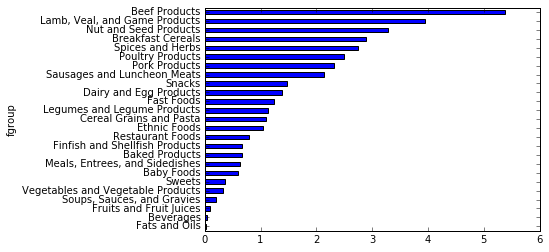

In [24]:
result['Zinc, Zn'].order().plot(kind='barh')

In [26]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [27]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 